In [7]:
!pip install networkx

## Exercice 1 :

- Un oiseau est un animal qui peut voler.
- Un mammifère est un animal qui allaite ses petits.
- Une chauve-souris est à la fois un mammifère et un oiseau.
- Les chauves-souris ne pondent pas d’œufs.

1. réseau sémantique
```mermaid
    graph
        Animal((Animal))
        Oiseau((Oiseau))
        Mammifere((Mammifère))
        ChauveSouris((Chauve-souris))
        pondre((Pondre))
        Voler((Voler))
        Allaiter((Allaiter))

        Mammifere -->|peut| Allaiter
        Mammifere -->|est un| Animal
        Oiseau -->|est un| Animal
        Oiseau -->|peut| Voler
        ChauveSouris -->|est un| Mammifere
        ChauveSouris -->|est un| Oiseau
        ChauveSouris -->|peut| Voler
        ChauveSouris -->|peut| pondre
        n(("non"))-->pondre
```

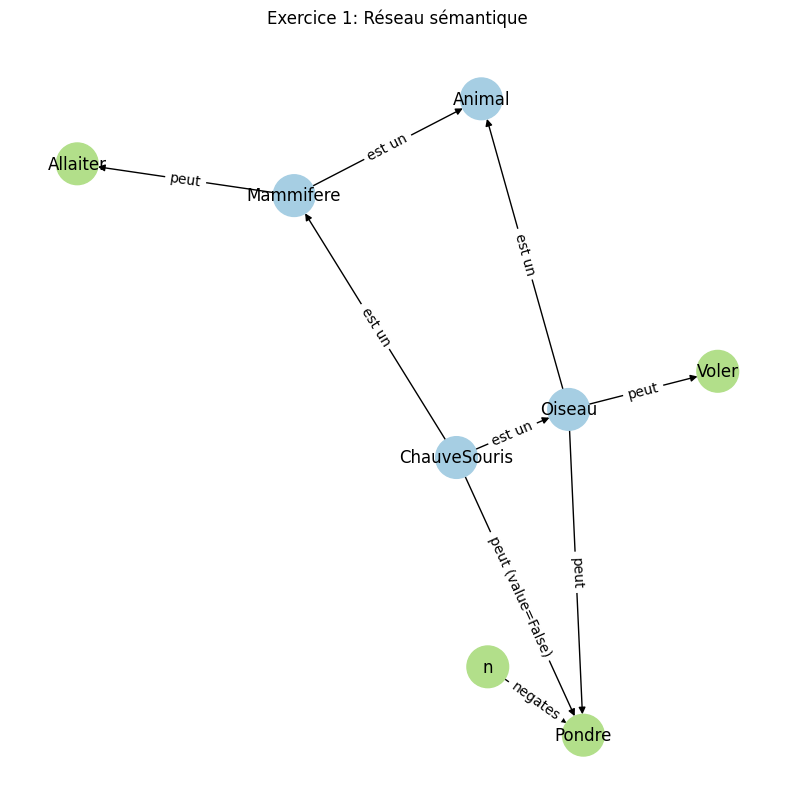

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G1 = nx.DiGraph()
# Noeuds
G1.add_node('Animal', kind='class')
G1.add_node('Oiseau', kind='class')
G1.add_node('Mammifere', kind='class')
G1.add_node('ChauveSouris', kind='class')
G1.add_node('Pondre', kind='property')
G1.add_node('Voler', kind='property')
G1.add_node('Allaiter', kind='property')
# Relations est un (child -> parent)
G1.add_edge('Oiseau','Animal', relation='est un')
G1.add_edge('Mammifere','Animal', relation='est un')
G1.add_edge('ChauveSouris','Mammifere', relation='est un')
G1.add_edge('ChauveSouris','Oiseau', relation='est un')
# Propriétés: Oiseau peut Voler et Pondre; Mammifere peut Allaiter
G1.add_edge('Oiseau','Voler', relation='peut')
G1.add_edge('Oiseau','Pondre', relation='peut')
G1.add_edge('Mammifere','Allaiter', relation='peut')
# Noeud explicite 'non' pointant vers Pondre (représente la négation dans le diagramme mermaid)
G1.add_node('n', kind='marker', label='non')
G1.add_edge('n','Pondre', relation='negates')
# Exception: chauve-souris n'a pas la propriété 'Pondre' (annule l'héritage)
G1.add_edge('ChauveSouris','Pondre', relation='peut', value=False)

# Visualisation rapide
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G1, seed=1)
colors = ['#a6cee3' if G1.nodes[n].get('kind')=='class' else '#b2df8a' for n in G1.nodes()]
nx.draw_networkx(G1, pos, node_color=colors, with_labels=True, node_size=900)
edge_labels = {(u,v): d.get('relation','') + ('' if 'value' not in d else (f" (value={d['value']})")) for u,v,d in G1.edges(data=True)}
nx.draw_networkx_edge_labels(G1, pos, edge_labels=edge_labels)
plt.title('Exercice 1: Réseau sémantique')
plt.axis('off')
plt.show()


## Exercice 2 :
- Tous les poissons vivent dans l’eau.
- Tous les animaux qui vivent dans l’eau peuvent nager.
- Les dauphins sont des mammifères.
- Les mammifères sont des animaux.
- Les dauphins vivent dans l’eau.

>En utilisant uniquement le réseau sémantique et la propagation d’héritage, démontrez que les dauphins peuvent nager


####  réseau sémantique
```mermaid
graph LR
    Animal((Animal))
    Poisson((Poisson))
    Mammifere((Mammifère))
    Dauphin((Dauphin))
    Eau((Etre <br> aquatique<hr>etre qui vie <br> dans l'eau))
    Nager((Nager))

    Poisson -->|est un| Eau
    Dauphin -->|est un| Eau
    Dauphin -->|est un| Mammifere
    Mammifere -->|est un| Animal
    Eau ---- et((et))
    Animal----et
    et-->|peut| Nager
```

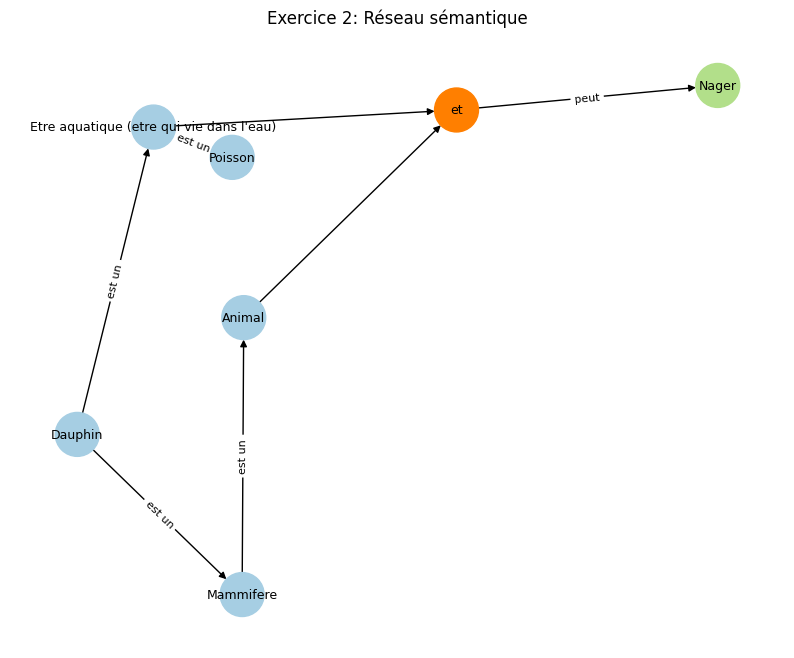

--- Démonstration: Les dauphins peuvent nager ---
Chemin Dauphin -> Eau: True
Chemin Dauphin -> Animal (via Mammifere): True
Eau et Animal convergent vers 'et': True
'et' -> Nager: True

Conclusion: Dauphin est un Etre aquatique (etre qui vie dans l'eau) ET Dauphin hérite de Animal, donc Dauphin peut Nager


In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G2 = nx.DiGraph()
Eau="Etre aquatique (etre qui vie dans l\'eau)"
# Noeuds
G2.add_node('Animal', kind='class')
G2.add_node('Poisson', kind='class')
G2.add_node('Mammifere', kind='class')
G2.add_node('Dauphin', kind='class')
G2.add_node(Eau, kind='class')
G2.add_node('Nager', kind='property')
G2.add_node('et', kind='connector')

# Relations "est un"
G2.add_edge('Poisson',Eau, relation='est un')
G2.add_edge('Dauphin',Eau, relation='est un')
G2.add_edge('Dauphin','Mammifere', relation='est un')
G2.add_edge('Mammifere','Animal', relation='est un')

# Connecteur logique "et" (non dirigé dans le mermaid, on ajoute les deux directions)
G2.add_edge(Eau,'et', relation='')
G2.add_edge('Animal','et', relation='')

# Relation du connecteur "et" vers la propriété
G2.add_edge('et','Nager', relation='peut')

# Visualisation
plt.figure(figsize=(10,8))
pos = nx.spring_layout(G2, seed=2)
colors = []
for n in G2.nodes():
    kind = G2.nodes[n].get('kind')
    if kind == 'class':
        colors.append('#a6cee3')
    elif kind == 'property':
        colors.append('#b2df8a')
    elif kind == 'connector':
        colors.append('#ff7f00')
    else:
        colors.append('#gray')

nx.draw_networkx(G2, pos, node_color=colors, with_labels=True, node_size=1000, font_size=9)
edge_labels = {(u,v): d.get('relation','') for u,v,d in G2.edges(data=True)}
nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels, font_size=8)
plt.title('Exercice 2: Réseau sémantique')
plt.axis('off')
plt.show()

print("--- Démonstration: Les dauphins peuvent nager ---")
print("Chemin Dauphin -> Eau:", nx.has_path(G2, 'Dauphin', Eau))
print("Chemin Dauphin -> Animal (via Mammifere):", nx.has_path(G2, 'Dauphin', 'Animal'))
print("Eau et Animal convergent vers 'et':", G2.has_edge(Eau,'et') and G2.has_edge('Animal','et'))
print("'et' -> Nager:", G2.has_edge('et','Nager'))
print(f"\nConclusion: Dauphin est un {Eau} ET Dauphin hérite de Animal, donc Dauphin peut Nager")
